1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Dataset shape: (3, 1000)

Eigenvalues:
 [ 2.82631571e+01 -1.48708854e-16  1.91534854e+00]
Eigenvectors:
 [[-0.10800047 -0.81649658  0.56715891]
 [-0.5866245  -0.40824829 -0.69943193]
 [-0.80262544  0.40824829  0.43488589]]

Eigenvalues using svd:
 [2.82698140e+01 1.91603982e+00 1.27798213e-31]
Eigenvectors using svd:
 [[-0.10804664  0.56715012 -0.81649658]
 [-0.58656756 -0.69947969 -0.40824829]
 [-0.80266084  0.43482055  0.40824829]]

Is the result equal?
Eigenvalues: True
Eigenvectors: True

Percent of the total variability explained by the principal component (1): 0.9365252401564884
Percent of the total variability explained by the 2 principal components: 1.0
Is it more than 99% of the total variability? True

Reduced dataset in the PCA basis:


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-2.864194,8.622510,-0.440779,-2.638670,-8.833320,3.989314,-3.291237,6.346448,-0.977338,-4.913816,...,-5.571861,-2.424678,-1.314185,2.112324,-2.285704,7.211762,5.391526,8.871478,-7.882255,10.492765
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-2.601551,0.071212,-0.352303,1.447108,1.094416,-2.162410,1.564769,-0.574520,-0.791139,0.167533,...,2.560092,0.492909,0.524610,-1.664563,0.562113,-2.859844,0.237760,0.848306,-1.432270,0.414449


Row '1', mean and std: 0.0 0.0


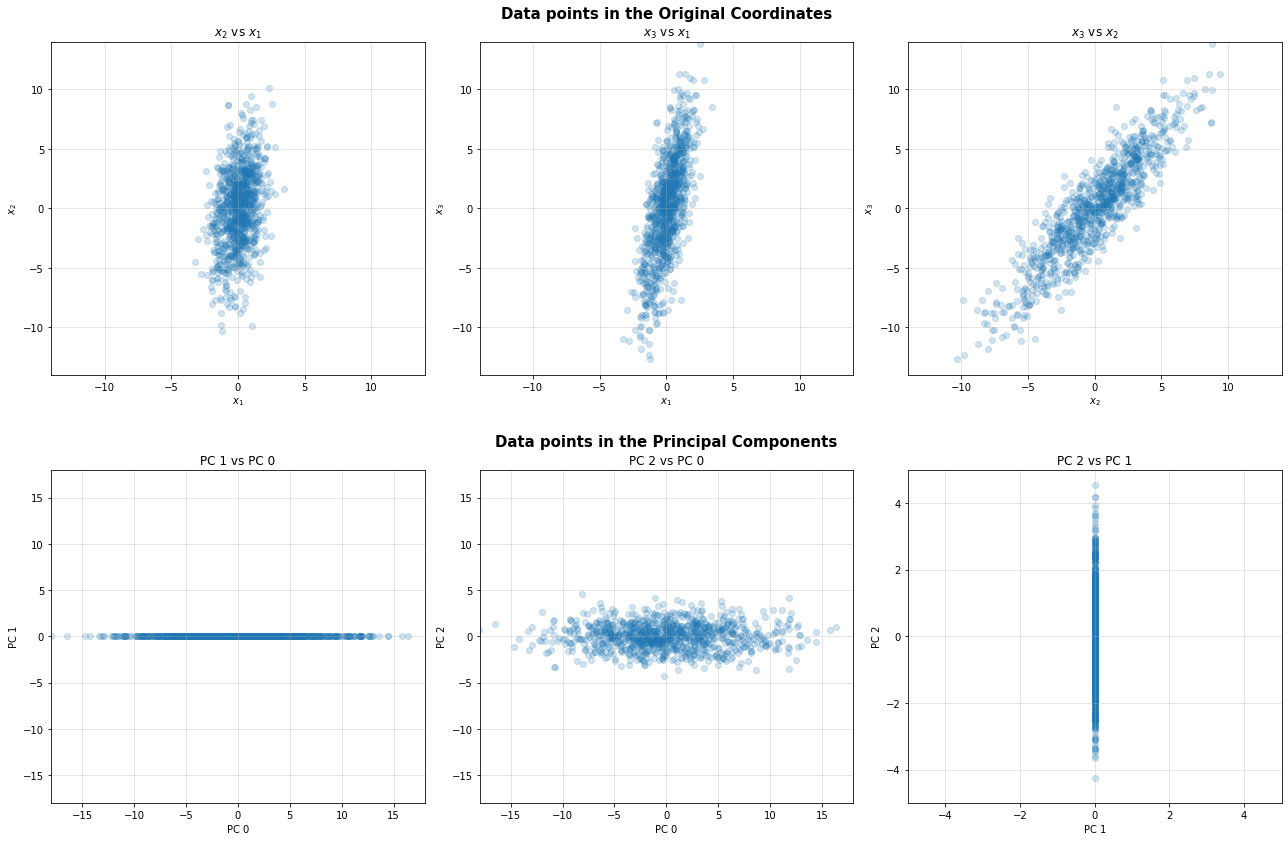

In [60]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec
from scipy import linalg as la

n = 1000
x1 = np.random.randn(n)
x2 = x1 + 3*np.random.randn(n)
x3 = 2*x1+x2

dataset = np.vstack((np.vstack((x1, x2)), x3))
print('Dataset shape:', dataset.shape)

cov = np.cov(dataset)

# Eigenvectors and eigenvalues of the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)
print('')
print('Eigenvalues:\n', l)
print('Eigenvectors:\n', V)

# Eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(dataset)
V_svd = U
l_svd = spectrum**2/(n-1)
print('')
print('Eigenvalues using svd:\n', l_svd)
print('Eigenvectors using svd:\n', V_svd)

print('\nIs the result equal?')
sort_PCA = np.argsort(l)[::-1]
print('Eigenvalues:', np.allclose(l_svd, (l)[sort_PCA], rtol=0.01))
print('Eigenvectors:', np.allclose(V_svd, V[:, sort_PCA], rtol=0.01))

# Principal components (variability)
variability_PC = np.sum(l_svd[0:1])/np.sum(l_svd)
print('')
print('Percent of the total variability explained by the principal component (1):', variability_PC)

variability_PC = np.sum(l_svd[0:2])/np.sum(l_svd)
print('Percent of the total variability explained by the 2 principal components:', variability_PC)
print('Is it more than 99% of the total variability?', variability_PC>=0.99)

# Reduce the dimensionality of the dataset 
D = np.zeros((3, n))
spectrum_red = spectrum
spectrum_red[2] = 0
np.fill_diagonal(D, spectrum_red)
dataset_reduced = np.dot(U, np.dot(D, Vt))

# PCA basis
dataset_PCA_basis = np.dot(V.T, dataset)

dataset_reduced_PCA_basis = np.dot(V.T, dataset_reduced)
dataset_reduced_PCA_basis[np.isclose(dataset_reduced_PCA_basis, np.zeros((3, n)))] = 0
print('\nReduced dataset in the PCA basis:')
dataset_reduced_PCA_basis = pd.DataFrame(dataset_reduced_PCA_basis)
display(dataset_reduced_PCA_basis)
print("Row '1', mean and std:", dataset_reduced_PCA_basis.iloc[1, :].mean(), dataset_reduced_PCA_basis.iloc[1, :].std())

# Plot
def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold', fontsize='15')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')
    
rows = 2
cols = 3
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))

alp = 0.2
alp_grid = 0.4

axs[0, 0].scatter(x1, x2, alpha=alp)
axs[0, 0].grid(alpha=alp_grid)
axs[0, 0].set_xlabel('$x_1$')
axs[0, 0].set_ylabel('$x_2$')
axs[0, 0].set_title('$x_2$ vs $x_1$')
axs[0, 1].scatter(x1, x3, alpha=alp)
axs[0, 1].grid(alpha=alp_grid)
axs[0, 1].set_xlabel('$x_1$')
axs[0, 1].set_ylabel('$x_3$')
axs[0, 1].set_title('$x_3$ vs $x_1$')
axs[0, 2].scatter(x2, x3, alpha=alp)
axs[0, 2].grid(alpha=alp_grid)
axs[0, 2].set_xlabel('$x_2$')
axs[0, 2].set_ylabel('$x_3$')
axs[0, 2].set_title('$x_3$ vs $x_2$')
axs[1, 0].scatter(dataset_PCA_basis[0], dataset_PCA_basis[1], alpha=alp)
axs[1, 0].grid(alpha=alp_grid)
axs[1, 0].set_xlabel('PC 0')
axs[1, 0].set_ylabel('PC 1')
axs[1, 0].set_title('PC 1 vs PC 0')
axs[1, 1].scatter(dataset_PCA_basis[0], dataset_PCA_basis[2], alpha=alp)
axs[1, 1].grid(alpha=alp_grid)
axs[1, 1].set_xlabel('PC 0')
axs[1, 1].set_ylabel('PC 2')
axs[1, 1].set_title('PC 2 vs PC 0')
axs[1, 2].scatter(dataset_PCA_basis[1], dataset_PCA_basis[2], alpha=alp)
axs[1, 2].grid(alpha=alp_grid)
axs[1, 2].set_xlabel('PC 1')
axs[1, 2].set_ylabel('PC 2')
axs[1, 2].set_title('PC 2 vs PC 1')

for i in range(3):
    axs[0, i].set_xlim(-14, 14)
    axs[0, i].set_ylim(-14, 14)
    
axs[1, 0].set_xlim(-18, 18)
axs[1, 0].set_ylim(-18, 18)
axs[1, 1].set_xlim(-18, 18)
axs[1, 1].set_ylim(-18, 18)
axs[1, 2].set_xlim(-5, 5)
axs[1, 2].set_ylim(-5, 5)

grid = plt.GridSpec(rows, cols)
create_subtitle(fig, grid[0, ::], 'Data points in the Original Coordinates')
create_subtitle(fig, grid[1, ::], 'Data points in the Principal Components')
fig.tight_layout()
fig.set_facecolor('w');



By keeping only the 2 principal components, we can still explain $\simeq 100\%$ of the total variability. This makes sense, because the original dataset is constructed in such a way that the variability of $x_1$ is negligible compared to the variability of $x_2$ and $x_3$, while $x_2$ and $x_3$ vary in a similar way. For this reason, I expect to have 1 principal component non-relevant. From the plots in the principal components, we see that the principal component '0' is the dominant one, while what happens in the principal component '1' is irrelevant. So we can reduce the dataset in the plane PC2 - PC0.

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [61]:
for i in range(10):
    dataset = np.vstack((dataset, np.random.rand(n)/50))


In [62]:
print('Dataset shape:', dataset.shape)
cov = np.cov(dataset)

# Eigenvectors and eigenvalues of the covariance matrix
l, V = la.eig(cov)
l = np.real_if_close(l)
print('')
print('Eigenvalues:\n', l)

# Eigenvectors and eigenvalues using SVD
U, spectrum, Vt = la.svd(dataset)
V_svd = U
l_svd = spectrum**2/(n-1)
print('')
print('Eigenvalues using svd:\n', l_svd)

# Principal components (variability)
variability_PC = np.sum(l_svd[0:1])/np.sum(l_svd)
i = 1
while variability_PC < 0.99:
    i+=1
    variability_PC = np.sum(l_svd[0:i])/np.sum(l_svd)

print('\nNumber of principal components needed to explain 0.99% of the total variability:', i)
print('Fraction of the total variability still explained:', np.sum(l[0:i])/np.sum(l))

# Reduce the dimensionality of the dataset 
D = np.zeros((13, n))
spectrum_red = spectrum
spectrum_red[i:] = 0
np.fill_diagonal(D, spectrum_red)
dataset_reduced = np.dot(U, np.dot(D, Vt))

# PCA basis
dataset_PCA_basis = np.dot(V.T, dataset)
dataset_reduced_PCA_basis = np.dot(V.T, dataset_reduced)
dataset_reduced_PCA_basis[np.isclose(dataset_reduced_PCA_basis, np.zeros((13, n)))] = 0
print('\nReduced dataset in the PCA basis:')
dataset_reduced_PCA_basis = pd.DataFrame(dataset_reduced_PCA_basis)
display(dataset_reduced_PCA_basis)

# Means and stds
dataset_PCA_meanstd = pd.DataFrame({'Mean': dataset_reduced_PCA_basis.mean(axis=1), 'Std': dataset_reduced_PCA_basis.std(axis=1)})
print("Means and stds in the principal components basis:")
display(dataset_PCA_meanstd)

Dataset shape: (13, 1000)

Eigenvalues:
 [2.82631575e+01 1.91534895e+00 1.27339069e-15 3.87744077e-05
 3.71748971e-05 3.62195318e-05 2.97708742e-05 3.04681126e-05
 3.45310214e-05 3.36699058e-05 3.16455969e-05 3.20835256e-05
 3.28442442e-05]

Eigenvalues using svd:
 [2.82698149e+01 1.91604065e+00 1.05450509e-03 3.81342061e-05
 3.71660013e-05 3.61506511e-05 3.41478070e-05 3.28828299e-05
 3.21699022e-05 3.16484696e-05 3.07353096e-05 2.99132843e-05
 1.26800800e-31]

Number of principal components needed to explain 0.99% of the total variability: 2
Fraction of the total variability still explained: 0.9999888272022139

Reduced dataset in the PCA basis:


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,2.864198,-8.622505,0.440786,2.638673,8.833325,-3.989307,3.291241,-6.346441,0.977342,4.913821,...,5.571865,2.424682,1.314191,-2.112319,2.285709,-7.211758,-5.391520,-8.871473,7.882261,-10.492761
1,-2.601540,0.071228,-0.352283,1.447129,1.094431,-2.162388,1.564780,-0.574505,-0.791119,0.167543,...,2.560105,0.492926,0.524624,-1.664543,0.562125,-2.859827,0.237782,0.848325,-1.432254,0.414463
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.000318,-0.000277,-0.000041,0.000318,0.000469,-0.000477,0.000359,-0.000303,-0.000093,0.000191,...,0.000593,0.000159,0.000127,-0.000335,0.000166,-0.000695,-0.000142,-0.000161,0.000036,-0.000285
4,-0.000036,-0.000032,-0.000005,0.000036,0.000054,-0.000054,0.000041,-0.000035,-0.000011,0.000022,...,0.000068,0.000018,0.000015,-0.000038,0.000019,-0.000079,-0.000016,-0.000018,0.000004,-0.000032
5,-0.000131,-0.000114,-0.000017,0.000131,0.000193,-0.000196,0.000147,-0.000125,-0.000038,0.000078,...,0.000244,0.000065,0.000052,-0.000138,0.000068,-0.000286,-0.000058,-0.000066,0.000015,-0.000117
6,-0.000186,-0.000162,-0.000024,0.000186,0.000275,-0.000279,0.000210,-0.000178,-0.000055,0.000112,...,0.000347,0.000093,0.000075,-0.000196,0.000097,-0.000407,-0.000083,-0.000095,0.000021,-0.000167
7,0.000213,0.000185,0.000028,-0.000213,-0.000314,0.000320,-0.000240,0.000203,0.000062,-0.000128,...,-0.000398,-0.000107,-0.000085,0.000225,-0.000111,0.000466,0.000095,0.000108,-0.000024,0.000191
8,-0.000487,-0.000424,-0.000063,0.000487,0.000719,-0.000731,0.000550,-0.000465,-0.000143,0.000292,...,0.000909,0.000244,0.000195,-0.000513,0.000254,-0.001066,-0.000218,-0.000247,0.000055,-0.000436
9,-0.000537,-0.000467,-0.000070,0.000537,0.000792,-0.000806,0.000606,-0.000512,-0.000157,0.000322,...,0.001002,0.000269,0.000215,-0.000566,0.000280,-0.001175,-0.000240,-0.000273,0.000060,-0.000481


Means and stds in the principal components basis:


,Mean,Std
0,8.155275e-02,5.316310
1,2.629722e-02,1.383961
2,0.000000e+00,0.000000
3,6.903179e-06,0.000283
4,7.875335e-07,0.000032
5,2.836000e-06,0.000116
6,4.044105e-06,0.000166
7,-4.627855e-06,0.000190
8,1.057780e-05,0.000433
9,1.166183e-05,0.000478


From the table of the means and the stds in the principal components, we see in fact that only the first 2 are important (from the point of view of the variability). I want to plot them. 

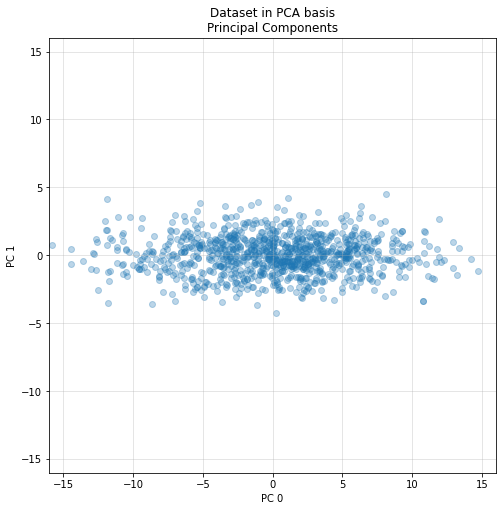

In [65]:
# Plot
sort_PCA = np.argsort(l)[::-1]

alp = 0.3
alp_grid = 0.4

plt.figure(figsize=(8, 8))
plt.scatter(dataset_PCA_basis[0], dataset_PCA_basis[1], alpha=alp)
plt.title('Dataset in PCA basis'+'\n'+'Principal Components')
plt.grid(alpha=alp_grid)
plt.xlabel('PC 0')
plt.ylabel('PC 1')

plt.xlim(-16, 16)
plt.ylim(-16, 16);

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [64]:
# get the dataset and its description on the proper data directory
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 